# Information theory visualized

This notebook creates a few figures to illustrate various simple concepts from information theory

First version: 9/15/2024
This version: 10/1/2024
https://northeastern-datalab.github.io/cs7840/fa24/calendar.html

In [1]:
import sys
sys.path.append("../")
import numpy as np
from entropy_models import(calculate_entropy,
                           calculate_entropy_vector,
                           plot_figure,
                           markov_chain_stationary,
                           markov_chain_sample,
                           calculate_relative_entropy,
                           calculate_relative_entropy_vector)
# from scipy.stats import entropy
import matplotlib.pyplot as plt
# import timeit

# 1: Property of Entropy (k=2 options)

### 1A: Show binary entropy curve

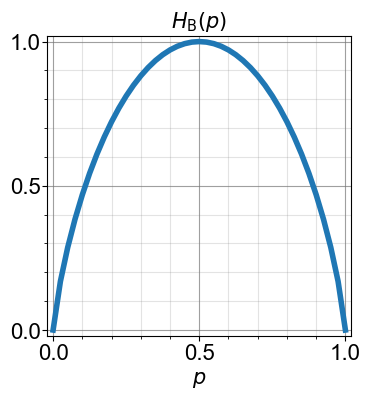

In [2]:
P = np.linspace(0, 1, 41)
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution

Y = calculate_entropy_vector(P_vec)
# print(Y)
plot_figure(P, Y, low=-0.02, high=1.02, title=r"$H_{\mathrm{B}}(p)$", show_legend=False, fine_grid=True, xlabel=r'$p$',
            ylabel=None, pdfname="Fig_Binary_Entropy", linewidth=(4,), squaresize=True)

### 1b: Show binary entorpy curve with annotations

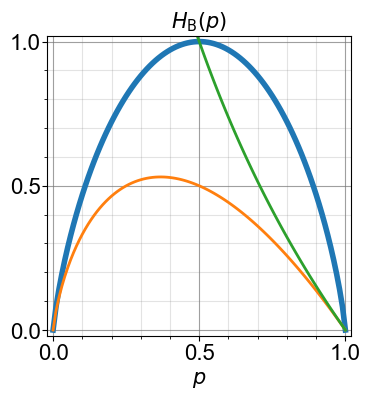

In [3]:
P = np.linspace(0, 1, 101)

# overall entropy
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution
Y = calculate_entropy_vector(P_vec)

# Expected surprise from p
with np.errstate(divide='ignore'):  # most efficient to temporarily ignore the inf error warning, also allows simple generalization to multi-dimensional arrays
    res = -np.log2(P)               # https://stackoverflow.com/questions/21752989/numpy-efficiently-avoid-0s-when-taking-logmatrix
res[np.isinf(res)] = 0
Z = P*res

# Surprise from p if p happens
with np.errstate(divide='ignore'):  # most efficient to temporarily ignore the inf error warning, also allows simple generalization to multi-dimensional arrays
    res = -np.log2(P)               # https://stackoverflow.com/questions/21752989/numpy-efficiently-avoid-0s-when-taking-logmatrix
res[np.isinf(res)] = 10000

# print(Y)
plot_figure(P, [Y,Z, res], low=-0.02, high=1.02, title=r"$H_{\mathrm{B}}(p)$", show_legend=False, fine_grid=True, xlabel=r'$p$',
            ylabel=None, pdfname="Fig_Binary_Entropy_annotated", linewidth=(4,2, 2), squaresize=True)

### 1c: Show entropy in the number of coin flips. Problem 2.1 from [Cover, Thomas'06]

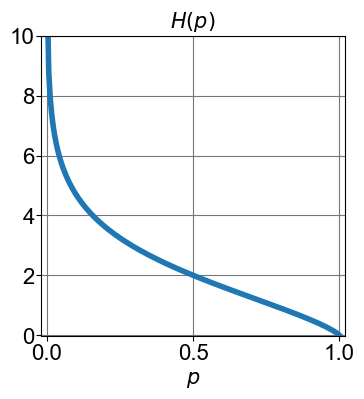

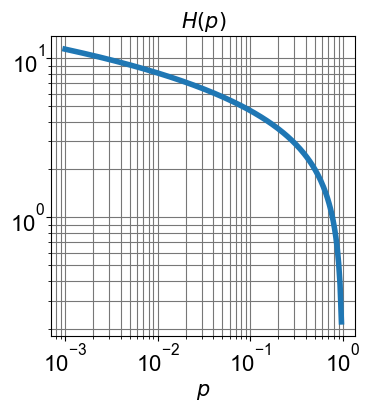

In [4]:
P = np.linspace(0.001, 1, 201)
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution

Y = calculate_entropy_vector(P_vec) # binary entropy
Z = Y/P     # actual entropy according to formula
plot_figure(P, Z, low=-0.02, high=1.02, ymax=10, title=r"$H(p)$", show_legend=False, fine_grid=False, xlabel=r'$p$',
            ylabel=None, pdfname="Fig_CoinFlip_Entropy", linewidth=(4,), squaresize=True)

P = np.logspace(-3, 0, 201, endpoint=False)
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution
Y = calculate_entropy_vector(P_vec)
Z = Y / P  # actual entropy according to formula
plot_figure(P, Z, low=-0.02, high=1.02, ymax=10, title=r"$H(p)$", show_legend=False, fine_grid=False,
            xlabel=r'$p$', logscale=True,
            ylabel=None, pdfname="Fig_CoinFlip_Entropy_logscale", linewidth=(4,), squaresize=True)

# 2: Markov Chains

### 2A: Restaurants

In [5]:
P_matrix = np.array([[0.7, 0.2, 0.1],
                     [0.3, 0.6, 0.1],
                     [0.3, 0.2, 0.5]])
print("Transition matrix:")
print(P_matrix)

mu = markov_chain_stationary(P_matrix)
print("Stationary distribution:", mu)

st = markov_chain_sample(P_matrix, 1000, int_to_char={0: 'B', 1: 'M', 2: 'S'})
print("A random sample:")
print(st)

print("Entropy of the MC and the Stationary Distribution (SD)")
entropy_MC = mu.dot(calculate_entropy_vector(P_matrix))
print(entropy_MC)
entropy_SD = calculate_entropy(mu)
print(entropy_SD)

Transition matrix:
[[0.7 0.2 0.1]
 [0.3 0.6 0.1]
 [0.3 0.2 0.5]]
Stationary distribution: [0.5        0.33333333 0.16666667]
A random sample:
BBBBBMBSSSBBBMBBBBBBBBBBBBSSBBSMMMMMMMBMMMMMMMBMMBBBSSSMMBBBMMMSSBBBBBMMMMMBSSBBBBBMMMMMBBBBBBMMSSSMBBSBMBBBMSBBBBBMMBBBBMBSBBBBBBBMSBBMMMMMMBSBBBBBBMSSBBMSSSSSMMMMSSMMMMMBBSSBBMSMBBBMMBBBBMMBBBBBBMBBSSSBBMBMMMMSSMBBBBBBBBMBMBBBMBMMMMMMMMMSSSSSSSBBMMBMBBBBMMBBBBMSSSMMMSSSSBBBMMMBMMBBMBBMMBSSBBBMBSBBBBSMSMMBBMMSSSBBMBBMMMMMBBMMBBBBBBMMBMMMMBBBMMMBMMMBBBBMSBMMBBMMMMMBBBMMMBBBSMBMMMBMMMMBBSSMBBBBMMMBBBMMMSMMMMSMSMBBBMMBBMMMMBBBBSBMMSMMMSMMMMSMMBBBMMMBBMMBMBMSSMBBBBBMMBBBBSMMSMBMBBBBBBBBBBBBMBBBSSSSSMBBSBBBSSSMMBBBSSSSSSMSSSMMBBBBBBBMMMMBBMMMBBBBBMMBBMSSBBMMMBSBBBBBSSBBBBBBBBMMMBBBBMMBBBBBBMBBBMMBBMMMMBMBBBBBBBBBBMBBBBBBMMBBBBBMSMBSSSSMMBBBBMMSBSBBMBMMBMMBBBMMMMBBMMSBMMMBBBBSSBMMSSBBBSBBBMBBSSSBBSBSBBMMSBMBBBMMBMMMMBSSBBBSMSSSSSBBBMMMBBBSMMBBBBBBBBBBBBMBBBBBBBBBMBBBMMSBMMMMBBBBBBBBMBBBBBBMBSSSBBBBBMMMMBBMBSSBBBBBMBBBSMBBBBBBBBBMBBBMMSSSBMBBSBSSSMMSSS

In [6]:
# re-use the code to create a sample with IID sampled letters
print("\nSame example, now assuming IID samples:")
P_matrix = np.array([mu, mu, mu])
mu = markov_chain_stationary(P_matrix)
print("Transition matrix:")
print(P_matrix)
print("Stationary distribution:", mu)

st = markov_chain_sample(P_matrix, 1000, int_to_char={0: 'B', 1: 'M', 2: 'S'})
print("A random sample:")
print(st)

print("Entropy of the MC and the Stationary Distribution (SD)")
entropy_MC = mu.dot(calculate_entropy_vector(P_matrix))
print(entropy_MC)


Same example, now assuming IID samples:
Transition matrix:
[[0.5        0.33333333 0.16666667]
 [0.5        0.33333333 0.16666667]
 [0.5        0.33333333 0.16666667]]
Stationary distribution: [0.5        0.33333333 0.16666667]
A random sample:
BBMMMBBMSSBBSBSBSBBMBMMBBBMSBMBMSSBBBMMMMMBBMBBMBMBBMBBMMSBBSBBMSMMBMBBSMBMSBSMBMBSBMBBMBMMMMBBMMSMSBBBBSBSMBMBBMBBBBMBMBBBBBBBBSBBBBMMMSSMBBBMBMBMBBBMBBBBMBMBMMBBBBMSMBSSSMBSMBBBMMSMBMBBBBSMBMMBBMSSBBMBBBMMSBMBBMSMMBBBMBMBBBBBSBMMSBMBBSBMBSBMBMSMMBMMSBBBMSSBMBSBSBSMMBMBSSBMBBBMSBMBSBSBBMMMSMBBBSMSMMBBBBBBBBBBBMMBSBBMBBBMBBMMMSBMSBMBBMBMBMBMMMMMSMBBMMMBBSBBSBSMBMBBMMMMBMBBBSBMSSBBBBMMBBMMBMBBBBBMBBSSBMMMBSMSBSSBMBSBMBBSBMBBMMBBBBMSBSMSBBMSMBBBMMMBMSBBBBMSMMBSBBMBMBMSSSMMMBMSBSBBSBMBBBSBBBMMBBMBMBMMBBMBBBSSBMMBSMBBSBBSBMMMBBMBSBBBMBBBBBBBBMBMMMMSBSMMMBBBMBBSMBMMBBMMBBBMBBMBBSMSBMMBSBBSMMBSSBBBMMBMBBMSBBMBBMMBMMSMMMSBBBBSBBBMSMSSMSMMMBSSBBBMMMSBSBBMBBMSSBBBBBSSMMMBBBMMBSMBMBSMBBMBMBBSBSSSMMBBMBBBBBMBBBBSBBBMMBBBBMMSMSBBBBBBMMBMBBMMMBMBMMBMBBBMSSM

### 2B: Simple two-state Markov Chain

In [7]:
p = 0.95
P_matrix = np.array([[p, 1-p],
                     [1-p, p]])
print("Transition matrix:")
print(P_matrix)

P = markov_chain_stationary(P_matrix)
print("Stationary distribution:", P)

st = markov_chain_sample(P_matrix, 1000)
print("A random sample:")
print(st)

print("Entropy of the MC and the Stationary Distribution (SD)")
entropy_MC = P.dot(calculate_entropy_vector(P_matrix))
print(entropy_MC)
entropy_SD = calculate_entropy(P)
print(entropy_SD)

Transition matrix:
[[0.95 0.05]
 [0.05 0.95]]
Stationary distribution: [0.5 0.5]
A random sample:
AAAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAABBBBBBAAABBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBAAAAAAABBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAAABBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB

In [8]:
p = 0.05
P_matrix = np.array([[p, 1-p],
                     [1-p, p]])
print("Transition matrix:")
print(P_matrix)

P = markov_chain_stationary(P_matrix)
print("Stationary distribution:", P)

st = markov_chain_sample(P_matrix, 1000)
print("A random sample:")
print(st)

print("Entropy of the MC and the Stationary Distribution (SD)")
entropy_MC = P.dot(calculate_entropy_vector(P_matrix))
print(entropy_MC)
entropy_SD = calculate_entropy(P)
print(entropy_SD)

Transition matrix:
[[0.05 0.95]
 [0.95 0.05]]
Stationary distribution: [0.5 0.5]
A random sample:
ABABABABABABABAABABABABABABABABABABABABABABBABABABABABABABAABABABABABABABABABABABABABBABABABBAABABABABABABABABABABABAABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABBABABBABABABABABABABABABABAAABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABBABABABBABABABABABABABBBABABABABABABABABABABABABBABABABABABAABABABABABABABBABABABABABABABABABABABABABABABABABABABABABABABABBABABBAABABABABABABABAABABABABABABABABABABABABBABABABABABABABABABABABBAABABABABABABABABABABABABABABABABABABABABABABABABABABBABAABABBABABABABABABABABABABABABABAABABABBABABABABABABABABABBABABBABABABABABABABABABABABABABABABBABABABABABABABABABABABABABABABABABABABABABABABABABABABABAABABABBABABABBABABABABABABABABABABABABABABABABABABABABABABABABABABABABBBABABABABABABABABABABABABABAABABBABABABABBABABABBABABABABABAABABABABBABABBABABABABABABABABABABABABABBABABABABABABABABABABABABABABABABABABABABABABABAB

# 3: Relative Entropy

Compares the relative entropy of a skewed binary distribution against the uniform distribution (in both directions)

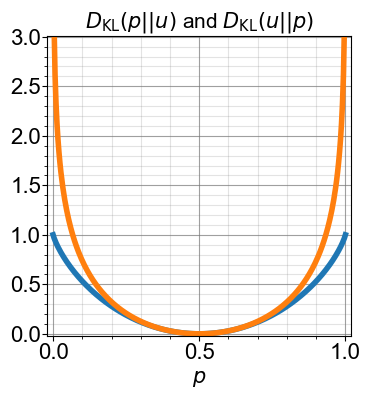


2.3291778797349196
0.9192068641040888


In [18]:
P = np.linspace(0, 1, 301)
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution
Q_vec = np.repeat(np.array([[0.5, 0.5]]), 301, axis=0)

RE1 = calculate_relative_entropy_vector(P_vec, Q_vec)
RE2 = calculate_relative_entropy_vector(Q_vec, P_vec)

plot_figure(P, (RE1, RE2), ymax=3.01, low=-0.02, high=1.02, title=r"$D_{\mathrm{KL}}(p||u)$ and $D_{\mathrm{KL}}(u||p)$", show_legend=False, fine_grid=True, xlabel=r'$p$',
            ylabel=None, pdfname="Fig_Relative_Entropy_Assymmetry",
            linewidth=(4,4), squaresize=True)

P = np.array([0.5, 0.5])
Q = np.array([0.01, 0.99])
print()
print(calculate_relative_entropy(P, Q))
print(calculate_relative_entropy(Q, P))